# import Librarys


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load the dataset 


In [2]:
df = pd.read_csv(r'E:\data science\projact\Household Power Consumption\household_power_consumption.csv')


In [3]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [5]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,13/12/2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


In [6]:
df.describe()

,Sub_metering_3
count,1.044506e+06
mean,5.933837e+00
std,8.210398e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [7]:
df.size

9437175

In [8]:
df.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df['Date'].describe()

count        1048575
unique           729
top       15/12/2007
freq            1440
Name: Date, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [11]:
df.size

9437175

In [12]:
df.shape

(1048575, 9)

In [13]:
df.ndim

2

In [14]:
df.duplicated().sum()

0

In [15]:
duplicate_counts = {column: df[column].duplicated().sum() for column in df.columns}


In [16]:
duplicate_counts  


{'Date': 1047846,
 'Time': 1047135,
 'Global_active_power': 1044499,
 'Global_reactive_power': 1048083,
 'Voltage': 1045970,
 'Global_intensity': 1048356,
 'Sub_metering_1': 1048493,
 'Sub_metering_2': 1048495,
 'Sub_metering_3': 1048542}

#  Data Cleaning 


In [17]:
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [18]:
df.isna().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

<Axes: >

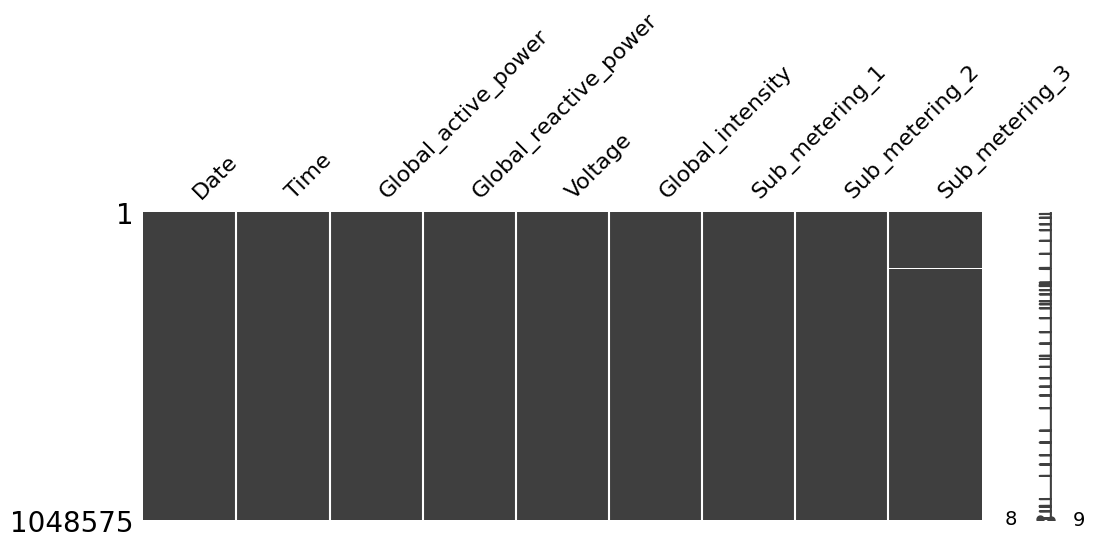

In [19]:
msno.matrix(df, figsize=(12, 4))

<Axes: >

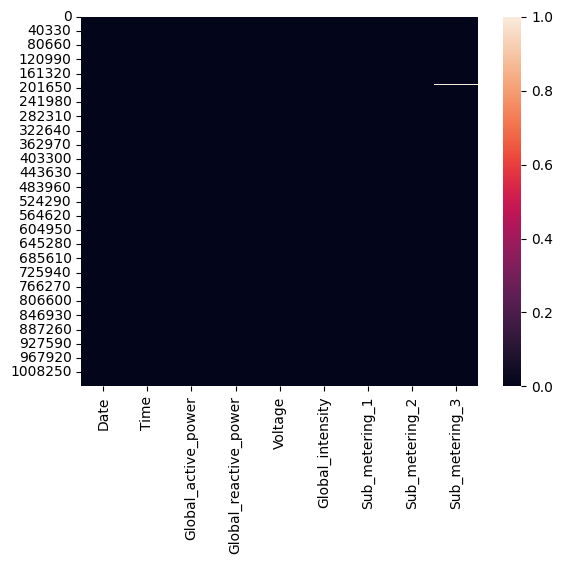

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.replace('?', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)

In [22]:
df['Date'].value_counts()

Date
15/12/2007    1440
7/4/2008      1440
9/4/2008      1440
10/4/2008     1440
11/4/2008     1440
              ... 
19/8/2007     1440
20/8/2007     1440
11/12/2008    1440
13/12/2008    1299
16/12/2006     396
Name: count, Length: 729, dtype: int64

In [23]:
df.replace({'8': '20/1/2007'}, inplace=True)

In [24]:
df["is_duplicate"]= df.duplicated()


In [25]:
df = df.drop_duplicates(subset=None,keep="first") # Dropping duplicate rows


In [26]:
df = df.drop(['is_duplicate'],axis=1)  # Dropping created 'is_duplicate' column 


In [27]:
df.shape

(1048575, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1044506 non-null  object 
 3   Global_reactive_power  1044506 non-null  object 
 4   Voltage                1044506 non-null  object 
 5   Global_intensity       1044506 non-null  object 
 6   Sub_metering_1         1044506 non-null  object 
 7   Sub_metering_2         1044506 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [29]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

# Data processing

In [30]:
#float - int = NaN
columns_to_convert = [
    'Global_active_power', 'Global_reactive_power', 'Voltage', 
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [31]:
#V = float
df['Global_active_power'] = [float(x) for x in df['Global_active_power']]
df['Global_reactive_power'] = [float(x) for x in df['Global_reactive_power']]
df['Voltage'] = [float(x) for x in df['Voltage']]
df['Global_intensity'] = [float(x) for x in df['Global_intensity']]
df['Sub_metering_1'] = [float(x) for x in df['Sub_metering_1']]
df['Sub_metering_2'] = [float(x) for x in df['Sub_metering_2']]
df['Sub_metering_3'] = [float(x) for x in df['Sub_metering_3']]

In [32]:
#NaN = mean
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\1897524774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\1897524774.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [33]:
missing_values = df.isnull().sum()

print(missing_values)


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [34]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

# Data Visualization 


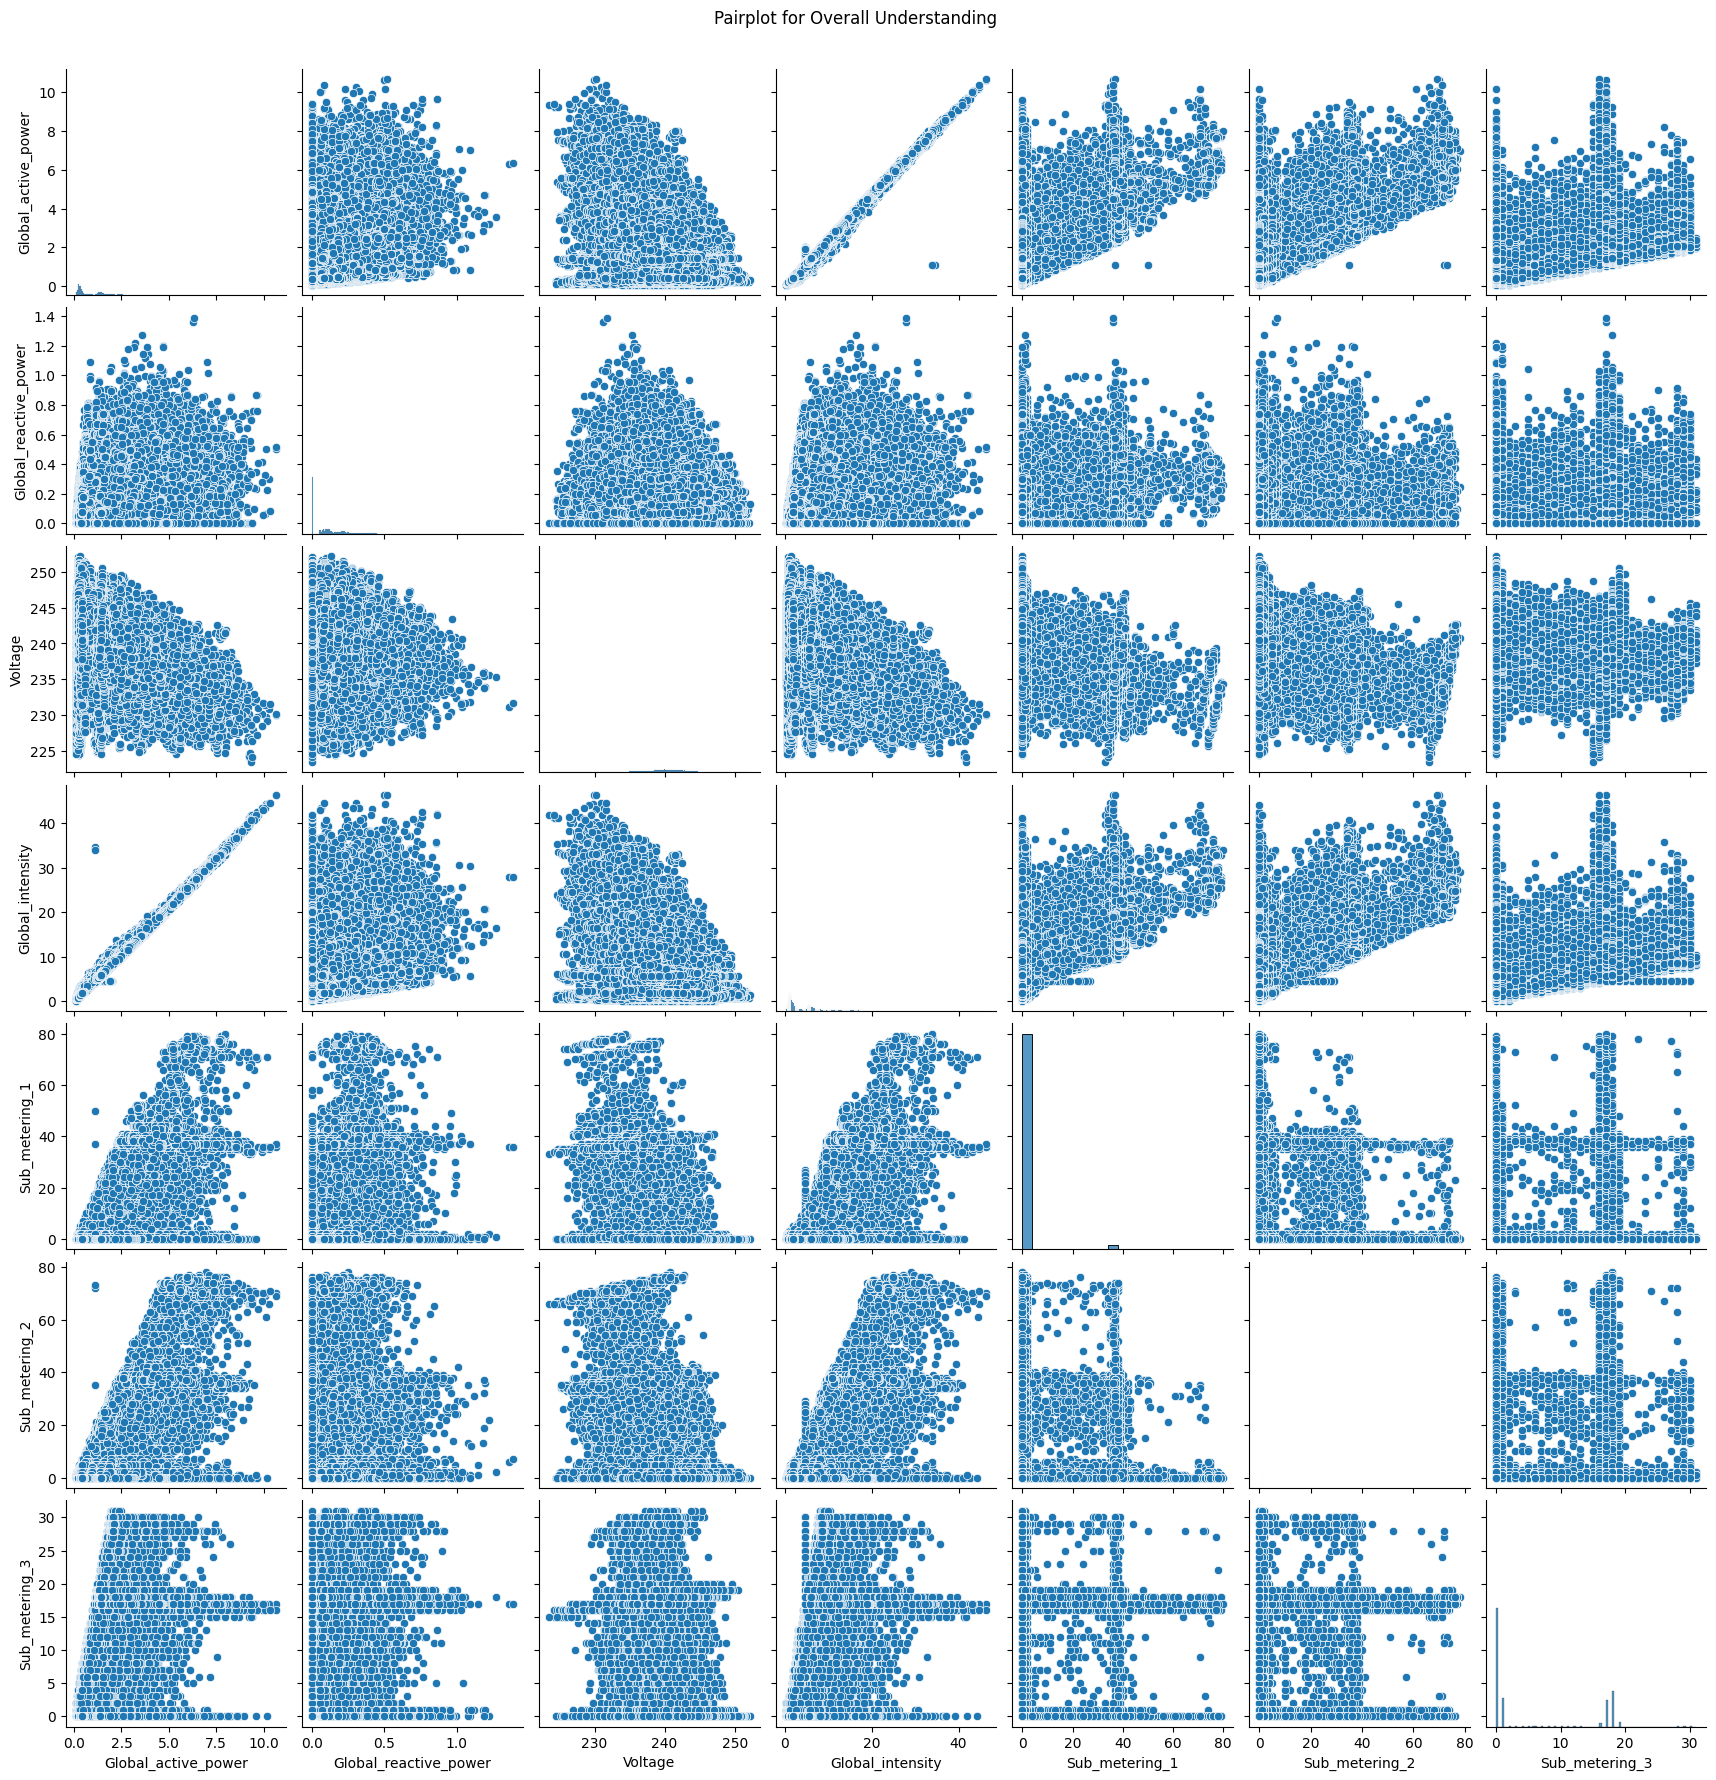

In [35]:
sns.pairplot(df, height=2.5)

plt.suptitle('Pairplot for Overall Understanding', y=1.02)  
plt.show()

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\2877019259.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


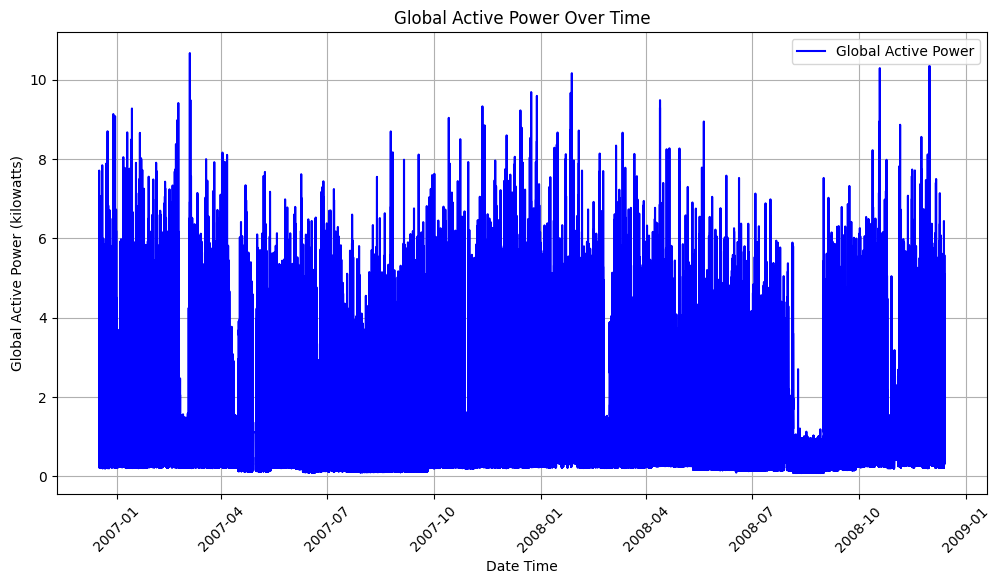

In [36]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Date Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [37]:
date_counts = df['Date'].value_counts()

most_frequent_date = date_counts.idxmax() 
most_frequent_count = date_counts.max()
print(f'The most frequent date is: {most_frequent_date} with {most_frequent_count} occurrences.')


The most frequent date is: 15/12/2007 with 1440 occurrences.


C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3127627265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


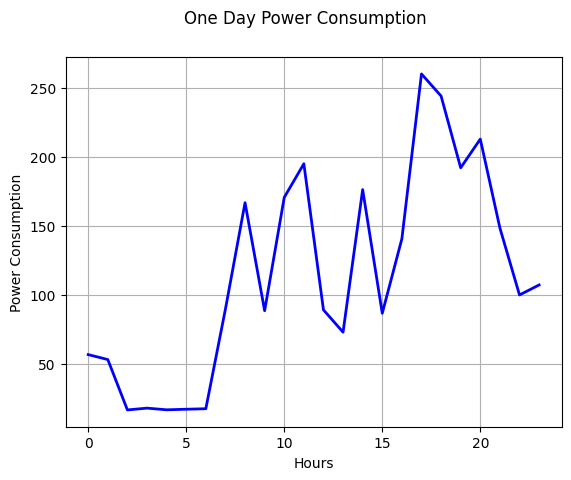

In [38]:
df_plot = df[df.Date == '15/12/2007']
df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_data = df_plot[['hour', 'Global_active_power']]
hourly_data = df_plot.groupby(['hour'], as_index = False)['Global_active_power'].agg('sum')
plt.plot(hourly_data['hour'], hourly_data['Global_active_power'], 'b', linewidth=2.0)
plt.xlabel('Hours')
plt.ylabel('Power Consumption')
plt.suptitle('One Day Power Consumption')
plt.grid(True)
plt.show()

# Data processing2

In [39]:
util_series = df['Date'] + ' ' + df['Time']
df['DateTime'] = util_series.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [40]:
dt = df.copy()

In [41]:
df.drop(columns = ['Date','Time'],inplace = True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
1048570,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00
1048571,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00
1048572,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00
1048573,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00


In [42]:
# Rearranging columns
cols = list(df.columns)
cols = cols[-1:] + cols[:-1]
data = df[cols]
data

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
1048570,2008-12-13 21:34:00,0.426,0.076,242.27,1.8,0.0,0.0,0.0
1048571,2008-12-13 21:35:00,0.424,0.076,242.10,1.8,0.0,0.0,0.0
1048572,2008-12-13 21:36:00,0.422,0.076,241.73,1.8,0.0,0.0,0.0
1048573,2008-12-13 21:37:00,0.422,0.078,242.56,1.8,0.0,0.0,0.0


In [43]:
data.columns

Index(['DateTime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [44]:
data['hour'] = data['DateTime'].dt.hour  

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3120948964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['DateTime'].dt.hour


In [45]:
highest_consumption = df.loc[df['Global_active_power'].idxmax()]
print(highest_consumption)


Global_active_power                    10.67
Global_reactive_power                  0.516
Voltage                                230.2
Global_intensity                        46.4
Sub_metering_1                          37.0
Sub_metering_2                          69.0
Sub_metering_3                          16.0
DateTime                 2007-03-04 19:34:00
Name: 112450, dtype: object


## Data Analysis

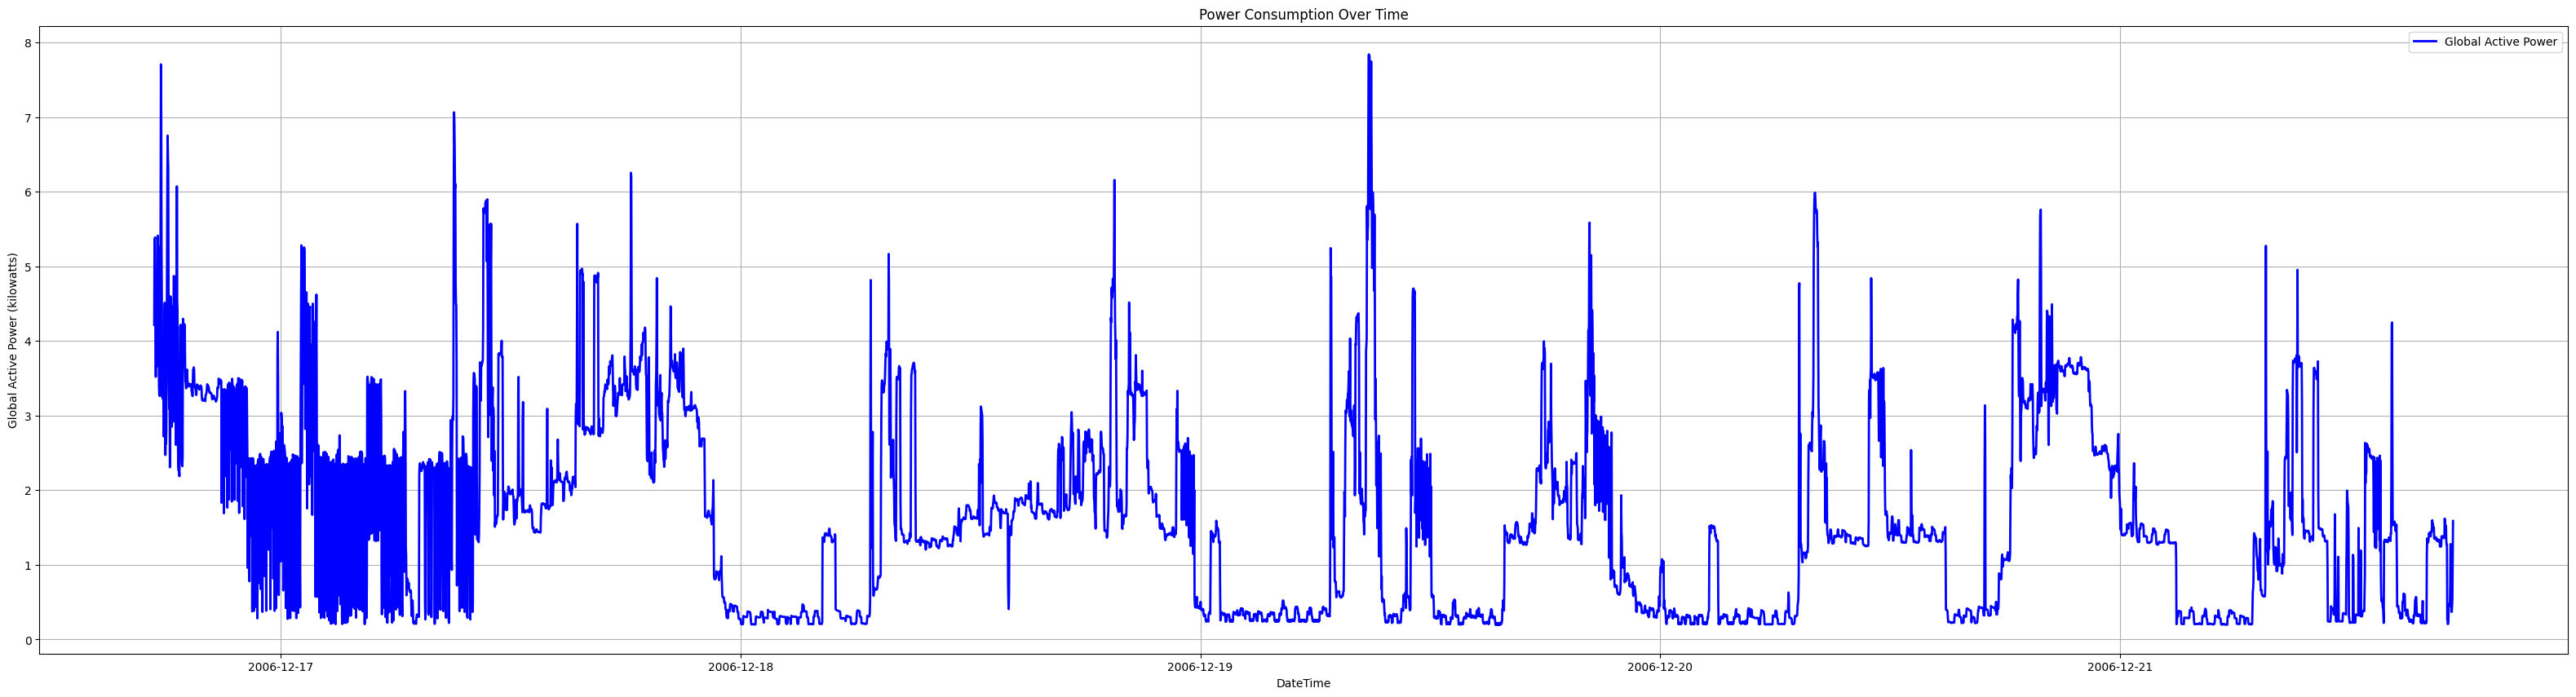

In [46]:
plt.figure(figsize=(40,10))
plt.plot(df['DateTime'][:7200], df['Global_active_power'][:7200], label='Global Active Power', color='blue', linewidth=2.0)
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Power Consumption Over Time')
plt.grid(True)
plt.legend()
plt.show()

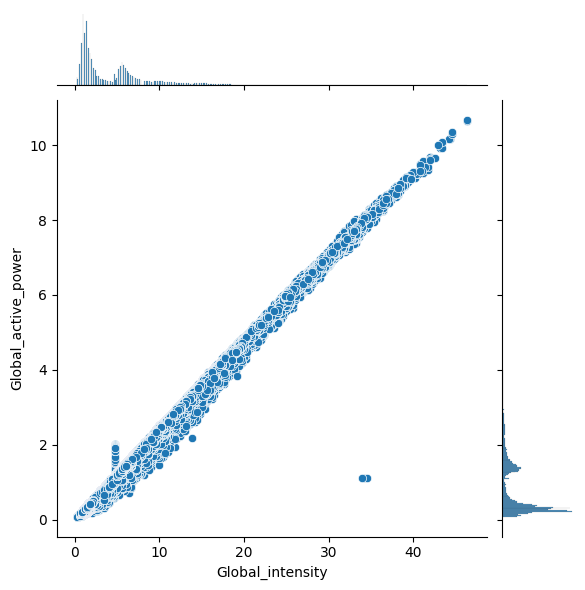

In [47]:
# The correlations between 'Global_intensity', 'Global_active_power'
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

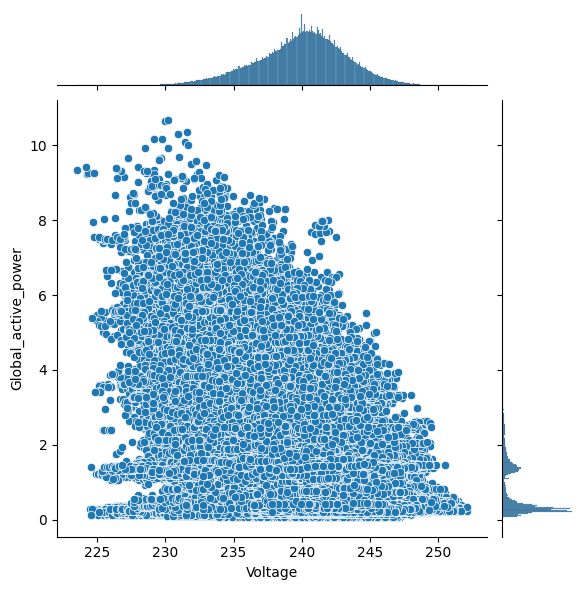

In [48]:
# The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()

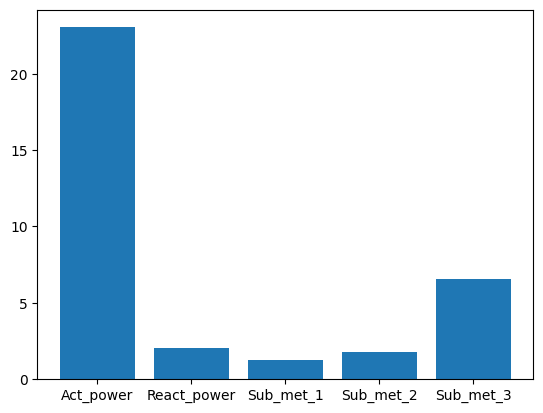

In [49]:
names = ['Act_power', 'React_power', 'Sub_met_1', 'Sub_met_2', 'Sub_met_3']
values = [23.042456, 2.027712, 1.232561, 1.783675, 6.553521]
plt.bar(names, values)
plt.show()

(8.0, 0.0)

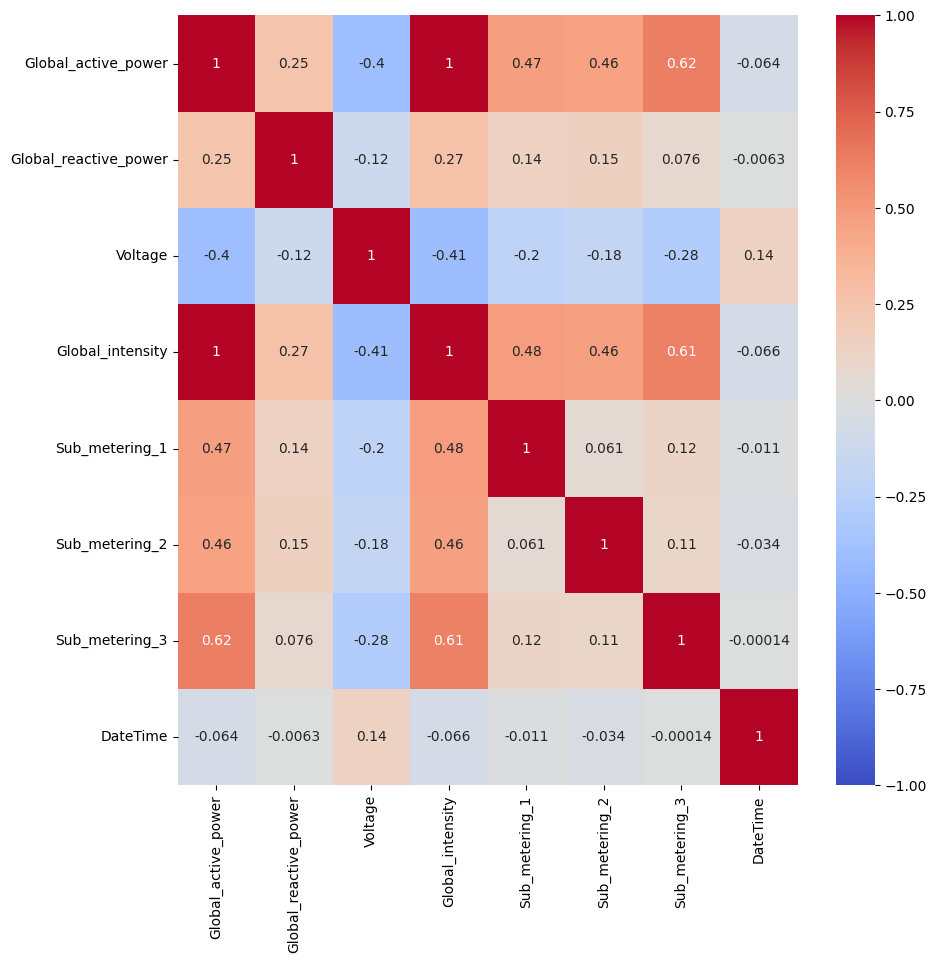

In [50]:
# Calculate correlations among Columns
#There is a strong correlation between 'Global_active_power and 'Global_intensity' beacuse P = V * I
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
ax.set_ylim(8, 0)

# Data processing3

In [51]:
def month(x):
    return x.month
data['Month']= data['DateTime'].apply(lambda x: month(x))

def Day(x):
    return x.Day
data['Day']=data['DateTime'].apply(lambda x: x.day)

def hour(x):
    return x.hour
data['Hour']= data['DateTime'].apply(lambda x: hour(x))

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3343078529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data['DateTime'].apply(lambda x: month(x))
C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3343078529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day']=data['DateTime'].apply(lambda x: x.day)
C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3343078529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [52]:
data.drop('DateTime',axis=1,inplace=True)
data.tail()

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\1078037314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('DateTime',axis=1,inplace=True)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,Month,Day,Hour
1048570,0.426,0.076,242.27,1.8,0.0,0.0,0.0,21,12,13,21
1048571,0.424,0.076,242.10,1.8,0.0,0.0,0.0,21,12,13,21
1048572,0.422,0.076,241.73,1.8,0.0,0.0,0.0,21,12,13,21
1048573,0.422,0.078,242.56,1.8,0.0,0.0,0.0,21,12,13,21
1048574,0.422,0.078,242.61,1.8,0.0,0.0,0.0,21,12,13,21


In [53]:
monthly_consumption = data.groupby('Month')['Global_active_power'].sum().reset_index()
max_consumption_month = monthly_consumption.loc[monthly_consumption['Global_active_power'].idxmax()]
print(max_consumption_month)

Month                      12.000000
Global_active_power    139443.729678
Name: 11, dtype: float64


In [54]:
min_consumption_month = monthly_consumption.loc[monthly_consumption['Global_active_power'].idxmin()]
print(min_consumption_month)

Month                      8.000000
Global_active_power    46464.936377
Name: 7, dtype: float64


In [55]:
daily_consumption = data.groupby('Day')['Global_active_power'].sum().reset_index()
max_consumption_day = daily_consumption.loc[daily_consumption['Global_active_power'].idxmax()]
print(max_consumption_day)

Day                        5.000000
Global_active_power    41071.218182
Name: 4, dtype: float64


In [56]:
min_consumption_day = daily_consumption.loc[daily_consumption['Global_active_power'].idxmin()]
print(min_consumption_day)

Day                       31.000000
Global_active_power    25051.068182
Name: 30, dtype: float64


## Data Analysis1

<Axes: xlabel='Month', ylabel='Global_active_power'>

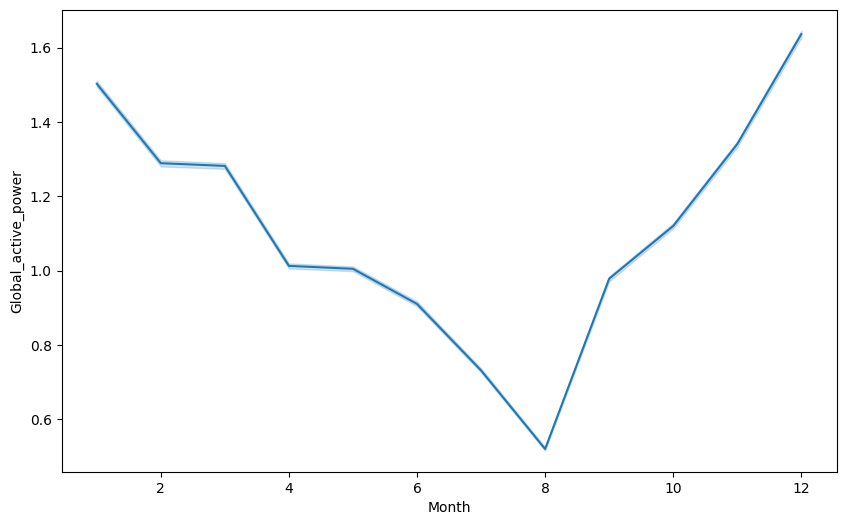

In [57]:
# Monthly change of Global_active_power
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Global_active_power",data=data)

<Axes: xlabel='Month', ylabel='Global_active_power'>

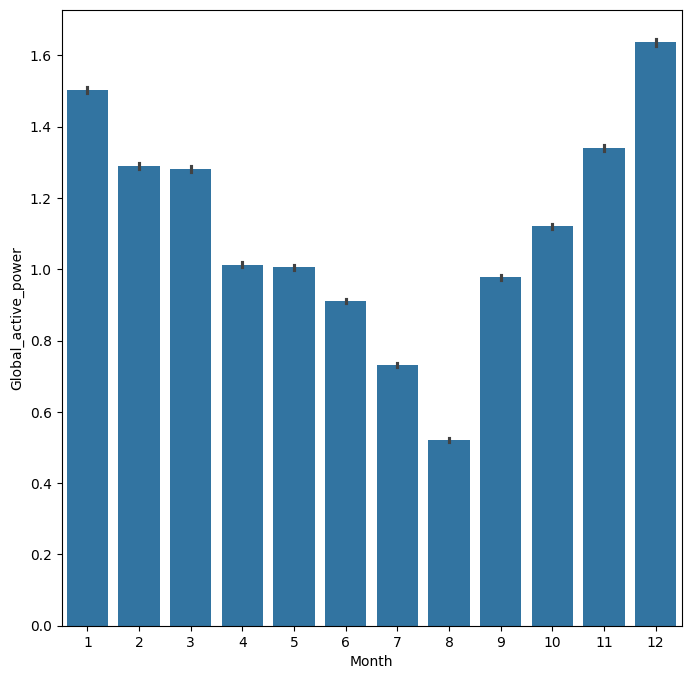

In [58]:
plt.figure(figsize=(8,8))
sns.barplot(x="Month", y="Global_active_power",data=data)

<Axes: xlabel='Day', ylabel='Global_active_power'>

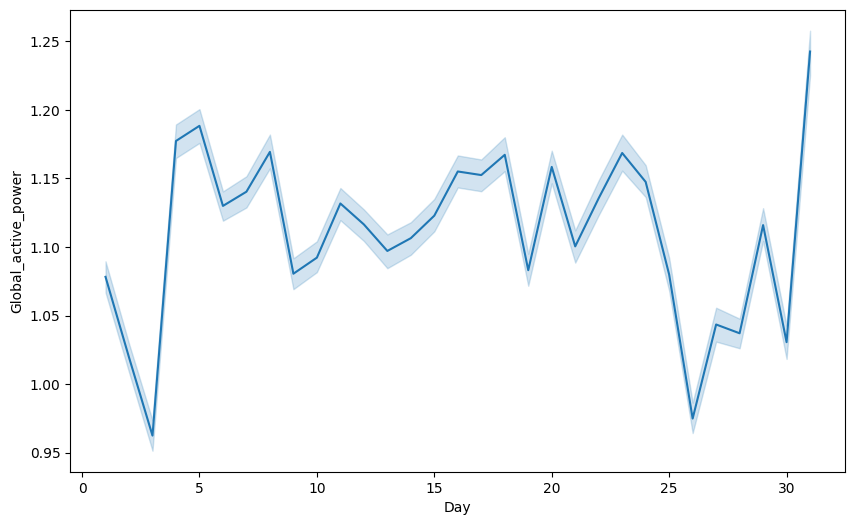

In [59]:
# Dayly change of Global_active_power
plt.figure(figsize=(10,6))
sns.lineplot(x="Day", y="Global_active_power",data=data)

<Axes: xlabel='Day', ylabel='Global_active_power'>

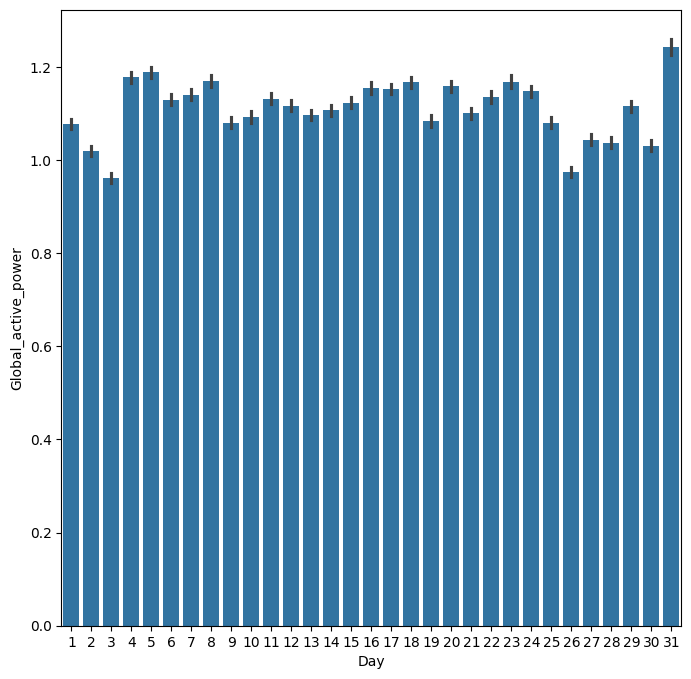

In [60]:
plt.figure(figsize=(8,8))
sns.barplot(x="Day", y="Global_active_power",data=data)

## Data Pre-processing

In [61]:
dt.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [62]:
X = df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

In [63]:
X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0.0,1.0,17.0
1,0.436,233.63,23.0,0.0,1.0,16.0
2,0.498,233.29,23.0,0.0,2.0,17.0
3,0.502,233.74,23.0,0.0,1.0,17.0
4,0.528,235.68,15.8,0.0,1.0,17.0


In [64]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 2.7424036 , -1.56180893,  2.88683243, -0.18643858, -0.07474477,
         1.35044645],
       [ 2.90709779, -1.93092251,  3.85588666, -0.18643858, -0.07474477,
         1.2284126 ],
       [ 3.47437777, -2.03464037,  3.85588666, -0.18643858,  0.08299173,
         1.35044645],
       ...,
       [-0.38678596,  0.5400031 , -0.61018933, -0.18643858, -0.23248127,
        -0.7241289 ],
       [-0.36848661,  0.79319671, -0.61018933, -0.18643858, -0.23248127,
        -0.7241289 ],
       [-0.36848661,  0.80844933, -0.61018933, -0.18643858, -0.23248127,
        -0.7241289 ]])

In [65]:
dt.shape

(1048575, 10)

In [66]:
# Rearranging columns
cols = list(dt.columns)
cols = cols[-1:] + cols[:-1]
dt2 = dt[cols]
dt2.head(5)

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [67]:
# add a column for for the remainder of sub metering
eq1 = (dt2['Global_active_power'] * 1000/60) 
eq2 = dt2['Sub_metering_1'] + dt2['Sub_metering_2'] + dt2['Sub_metering_3']
dt2['Sub_metering_4'] = eq1 - eq2
dt2.head(3)

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3323042364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Sub_metering_4'] = eq1 - eq2


,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [68]:
# drop old Date and Time columns
dt2.drop(columns = ['Date','Time'],inplace = True)
dt2.head(3)

C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\3920541985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2.drop(columns = ['Date','Time'],inplace = True)


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Normalizing the Data


In [70]:
scaler = MinMaxScaler()

In [71]:
X_train = scaler.fit_transform(X_train)

In [72]:
X_test = scaler.transform(X_test)

### Linear Regression

In [73]:
lm = LinearRegression()

In [74]:
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

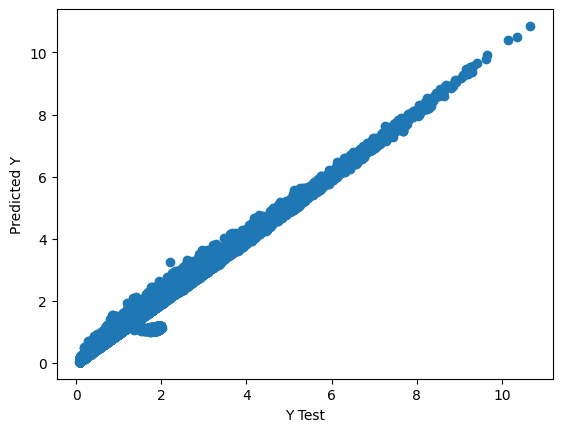

In [76]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.03187443441220645
MSE: 0.005723919407159121
RMSE: 0.07565658865663401


C:\Users\AL-MOSTAFA\AppData\Local\Temp\ipykernel_12068\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='Global_active_power', ylabel='Density'>

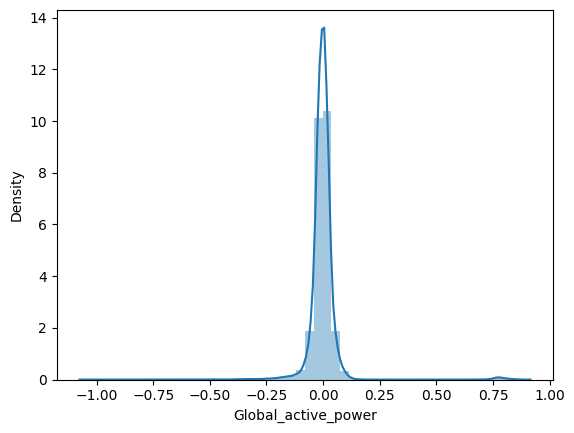

In [78]:
sns.distplot((y_test-predictions),bins=50)

In [79]:
r2_score = metrics.r2_score(y_test, predictions)
print('R² score:', r2_score) 

R² score: 0.995503930247874


In [80]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
320596,1.270,1.281793
998289,1.932,1.156130
137196,5.544,5.502067
968032,4.426,4.407168
393933,0.110,0.101424
...,...,...
545703,3.194,3.146685
678155,0.416,0.449570
295433,1.698,1.672024
562093,0.310,0.280658


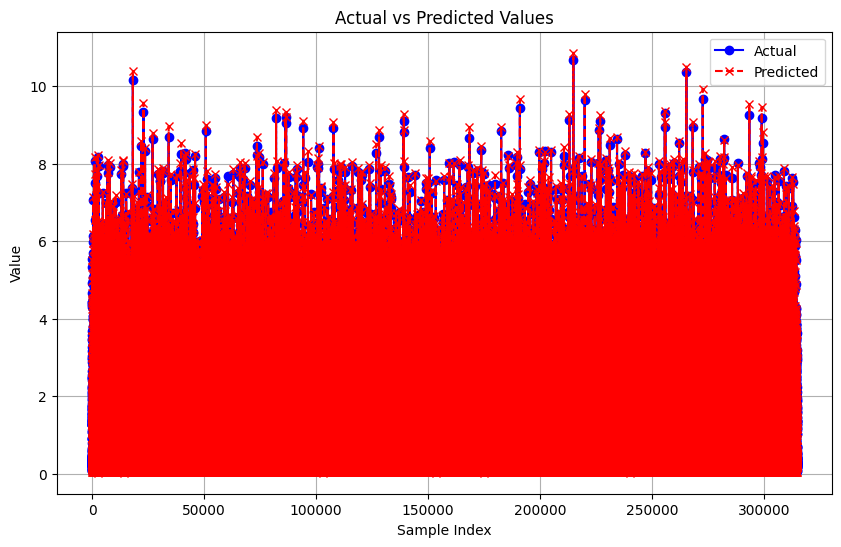

In [81]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

plt.figure(figsize=(10, 6))
plt.plot(df_result['Actual'].values, label='Actual', color='blue', marker='o', linestyle='-')
plt.plot(df_result['Predicted'].values, label='Predicted', color='red', marker='x', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [82]:
df_result.head(5)


,Actual,Predicted
320596,1.270,1.281793
998289,1.932,1.156130
137196,5.544,5.502067
968032,4.426,4.407168
393933,0.110,0.101424


In [83]:
import joblib
joblib.dump(lm, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [84]:
df_result.to_csv('predictions_results.csv', index=False)


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


def categorize_power(value):
    if value < 1:
        return 'Low'
    elif value < 3:
        return 'Medium'
    else:
        return 'High'

df['Power_Category'] = df['Global_active_power'].apply(categorize_power)

X_classification =df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y_classification =df['Power_Category']


X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

y_pred_class = rf_classifier.predict(X_test_class)

print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


[[ 23185      0    176]
 [     0 178588    606]
 [   299    306 111413]]
              precision    recall  f1-score   support

        High       0.99      0.99      0.99     23361
         Low       1.00      1.00      1.00    179194
      Medium       0.99      0.99      0.99    112018

    accuracy                           1.00    314573
   macro avg       0.99      0.99      0.99    314573
weighted avg       1.00      1.00      1.00    314573



In [89]:
results_df = pd.DataFrame({
    'Actual': y_test_class,
    'Predicted': y_pred_class
})

results_df.to_csv('classification_results.csv', index=False)